# A1Q3


In [35]:
# Standard imports
import numpy as np
import math
import matplotlib.pyplot as plt

# (a) Implement `PowerSin(x)`

In [44]:
def PowerSin(x):
    '''
     sum, n = PowerSin(x)
     
     Computes an approximation of the sin function using a power series.
     
     Input:
      x    scalar value
      
     Output:
      sum  scalar value
      n    the number of terms used in the series
    '''
    n = 0
    sum = 0
    term = 1
    while (sum + term != sum):
        power = 2*n+1
        numerator = math.pow(x,power)
        denominator = math.factorial(power)
        term = numerator/denominator
        if (n % 2 == 1):
            term = -term
        sum = sum + term
        n += 1
    
    return sum, n

In [45]:
val, n = PowerSin(np.pi/6.)
print(val)
print(f'{n} terms')

0.49999999999999994
9 terms


# (b) Plot

Text(0, 0.5, 'PowerSin(x)')

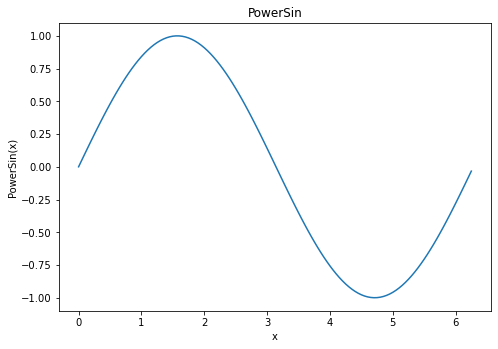

In [43]:
%matplotlib inline
x = np.arange(0, math.pi*2, 0.05)
vecd = np.vectorize(PowerSin)
y = vecd(x)
#print(x,'\n', len(x), '\n', y[0], '\n', len(y[0]))
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x,y[0])
ax.set_title("PowerSin")
ax.set_xlabel('x')
ax.set_ylabel('PowerSin(x)')

# (c)

the loop terminates when there is a term so small that the floating point system rounds it down to 0

# (d) Error of `PowerSin`

In [48]:
import pandas as pd
values = [math.pi/2, 11*math.pi/2, 21*math.pi/2, 31*math.pi/2]
data = []
for x in values:
    powersinned = PowerSin(x)
    powersin = powersinned[0]
    terms = powersinned[1]
    exact = math.sin(x)
    abserr = abs(powersin-exact)
    relerr = abserr/abs(exact)
    data.append([powersin, exact, terms, abserr, relerr])
pd.DataFrame(data, columns=["computed value","exact value","number of terms","absolute error","relative error"])

,computed value,exact value,number of terms,absolute error,relative error
0,1.000000,1.0,12,2.220446e-16,2.220446e-16
1,-1.000000,-1.0,38,1.559011e-10,1.559011e-10
2,1.004625,1.0,60,4.624905e-03,4.624905e-03
3,17863.025855,-1.0,78,1.786403e+04,1.786403e+04


# (e) Conclusions


it works better at values of x closer to 0. if the magnitude is too large, it creates more floating point errors, and after a certain point it just goes haywire with overflow. it is thus not ideal for this function, unless you just use values of x with small magnitude (ie, within a single wavelength)
